<a href="https://colab.research.google.com/github/Jane-Ngala/DSC14-Week-2-IP/blob/main/DSC14_WEEK_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINANCIAL INCLUSION ANALYSIS


## Defining the Question

a) Specifying the Data Analytic Question

Which individuals are most likely to have or use a bank account?

b) Metric for Success

Project will be successful when we are able to accurately answer the business problem from clean data

c) Understanding the context

Data to be analysed is demographic, showing financial services used by individuals across East Africa, from 2016 to 2018.




d) Recording the Experimental Design

Data to be investigated, cleaned then analysed

e) Data Relevance

Does the data answer the research problem as  expected?

## Reading the data

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Loading data

url = 'http://bit.ly/FinancialDataset'
finances=pd.read_csv(url)

## Checking the data

In [3]:
# Determining the no. of records in our dataset

finances.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset

finances.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
# 
finances.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Datatype check
#
finances.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

- Year datatype needs to be corrected

In [7]:
# Import datetime library
from datetime import datetime

In [8]:
# Converting datetime to string
finances['year'] = finances['year'].astype('str')
finances['year'] =  pd.to_datetime(finances['year'],format='%Y-%m-%d')

finances.dtypes

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

## Tidying the Dataset

In [9]:
# Tidying up column names

finances.columns = finances.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
finances.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [10]:
# Dropping unnecessary columns

finances.drop(['uniqueid', 'the_relathip_with_head'], axis = 1, inplace = True) 
finances

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_educuation,type_of_job
0,Kenya,2018-01-01,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018-01-01,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018-01-01,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018-01-01,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018-01-01,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


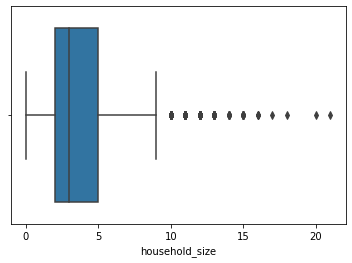

In [11]:
# Checking for Outliers in household_size
#
sns.boxplot(x =finances['household_size'])


-  household_size has outliers

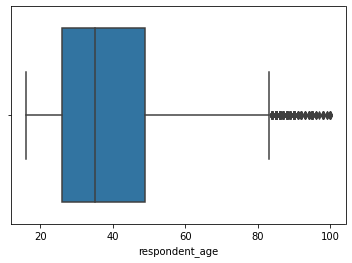

In [12]:
# Checking for Outliers in Respondent Age
#
sns.boxplot(x =finances['respondent_age'])


- Respondents age has outliers

In [13]:
# Removing the outlliers using IQR.
Q1 = finances.quantile(0.25)
Q3 = finances.quantile(0.75)
IQR = Q3 - Q1
IQR

finances['year'] = finances['year'].astype('str')

new_finances = finances[~((finances < (Q1 - 1.5 * IQR)) |(finances> (Q3 + 1.5 * IQR))).any(axis=1)]
new_finances.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


(22906, 11)

In [14]:
# Checking for missing data
#
new_finances.isnull().sum()

# Dropping the missing data
#
finances_df=new_finances.dropna()
finances_df.isnull().sum()

country                 0
year                    0
has_a_bank_account      0
type_of_location        0
cell_phone_access       0
household_size          0
respondent_age          0
gender_of_respondent    0
marital_status          0
level_of_educuation     0
type_of_job             0
dtype: int64

In [15]:
# Checking for duplicates.
finances_df.duplicated().sum()


4912

## EDA

In [16]:
finances_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22728 entries, 0 to 23522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               22728 non-null  object 
 1   year                  22728 non-null  object 
 2   has_a_bank_account    22728 non-null  object 
 3   type_of_location      22728 non-null  object 
 4   cell_phone_access     22728 non-null  object 
 5   household_size        22728 non-null  float64
 6   respondent_age        22728 non-null  float64
 7   gender_of_respondent  22728 non-null  object 
 8   marital_status        22728 non-null  object 
 9   level_of_educuation   22728 non-null  object 
 10  type_of_job           22728 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.1+ MB


In [17]:
# The most frequent household size entries

finances_df['household_size'].mode()

0    2.0
dtype: float64

- Most respondents belonged to a household size of 2

In [18]:
# Type of location that had most entries

finances_df['type_of_location'].mode()

0    Rural
dtype: object

- Most respondents were from the Rural area

In [19]:
finances_df['marital_status'].mode()

0    Married/Living together
dtype: object

- Most respondents were married and living together

In [20]:
finances_df['level_of_educuation'].mode()

0    Primary education
dtype: object

- For most respondents Primary Education is their highest level of Education

In [21]:
finances_df['respondent_age'].mode()

0    30.0
dtype: float64

- Most respondents were 30 years old

In [22]:
finances_df['gender_of_respondent'].mode()  

0    Female
dtype: object

- Most respondents were Female

In [23]:
finances_df['type_of_job'].mode()

0    Self employed
dtype: object

- Most respondents were self-employed

In [24]:
# Determining the skewness of the data

finances_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


household_size    0.605781
respondent_age    0.740260
dtype: float64

In [25]:
# Determining the Kurtosis

finances_df.kurt()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


household_size   -0.505607
respondent_age   -0.237324
dtype: float64

In [26]:
# Determining the Variance


finances_df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


household_size      4.328364
respondent_age    249.832274
dtype: float64

In [27]:
# Determining standard deviation


finances_df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


household_size     2.080472
respondent_age    15.806083
dtype: float64

In [28]:
# Finding the quantiles

finances_df.quantile([0.25,0.5,0.75])

,household_size,respondent_age
0.25,2.0,26.0
0.50,3.0,35.0
0.75,5.0,48.0


In [29]:
# Obtaining data description.
finances_df.describe()

,household_size,respondent_age
count,22728.000000,22728.000000
mean,3.579945,38.346445
std,2.080472,15.806083
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


## Univariate Analysis

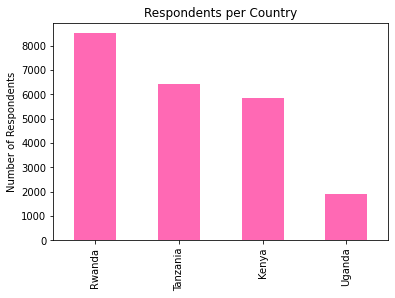

In [30]:
# The number of respondents in each country

country = finances_df['country'].value_counts()

country.plot.bar(title = 'Respondents per Country', color = 'hotpink', ylabel = 'Number of Respondents')



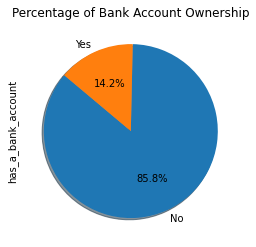

In [31]:
# Overall percentage of those with bank accounts and those without

bank_account = finances_df['has_a_bank_account'].value_counts()

bank_account.plot.pie(title = 'Percentage of Bank Account Ownership',autopct='%1.1f%%', shadow = True, startangle = 140)

Text(0.5, 1.0, 'Distribution of respondents by location')

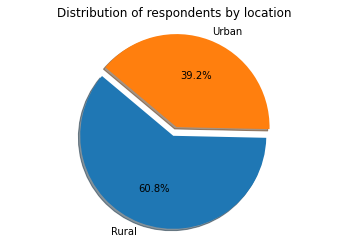

In [32]:
# Type of location distribution (Rural vs Urban)

location_type = finances_df['type_of_location'].value_counts()
labels = finances_df['type_of_location'].unique()
explode = (0,0.1)

plt.pie(location_type, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 140 )
plt.axis('equal')
plt.title('Distribution of respondents by location')


Text(0, 0.5, 'Bank Accounts')

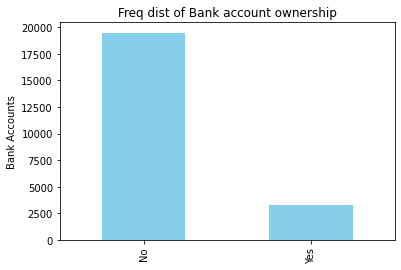

In [33]:
# Visualisation of bank account ownership count.

finances_df['has_a_bank_account'].value_counts().plot.bar(title='Freq dist of Bank account ownership',color = 'skyblue' )
plt.ylabel('Bank Accounts')


## Bivariate Analysis

Text(0.5, 1.0, 'Phone Access by Gender of Bank Account Owners per Country')

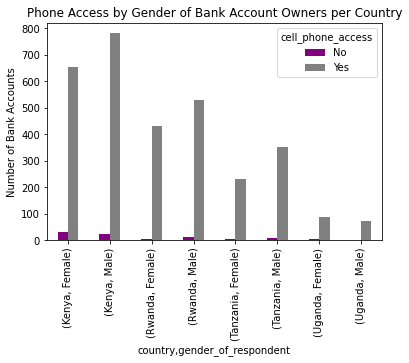

In [34]:
# Visualisation to see gender distibution of those with phones 
# and have a bank account

bank_account = finances_df[finances_df['has_a_bank_account'] == 'Yes']
bank_account.groupby (['country', 'gender_of_respondent', 'cell_phone_access'])['has_a_bank_account'].count().unstack().plot(kind='bar',color=('purple','grey'))
plt.ylabel('Number of Bank Accounts')
plt.title('Phone Access by Gender of Bank Account Owners per Country')

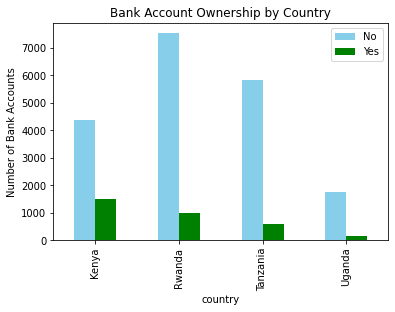

In [35]:
# Visualisation to check Bank account ownership in the country.

# Plotting a bar graph 
finances_df.groupby(['country','has_a_bank_account']).year.count().unstack().plot(kind='bar',color=('skyblue','green'))

plt.title('Bank Account Ownership by Country')
plt.xlabel('country')
plt.ylabel('Number of Bank Accounts')
plt.legend(fontsize=10)

Text(0.5, 1.0, 'Gender Distribution of Bank Account Ownership by Country')

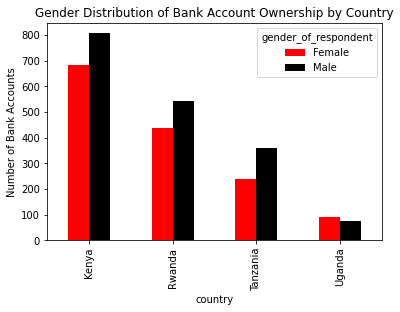

In [36]:
# Visualisation to check Bank account onwnership in the countries given gender.

country = bank_account.groupby (['country','gender_of_respondent'])['has_a_bank_account'].count().unstack().plot(kind='bar',color=('red','black'))

plt.ylabel('Number of Bank Accounts')
plt.title('Gender Distribution of Bank Account Ownership by Country')



In [37]:
# Checking for correlation of the numerical variables

finances_df.corr()

,household_size,respondent_age
household_size,1.000000,-0.106259
respondent_age,-0.106259,1.000000


Text(0.5, 1.0, 'Comparability of Having a Bank Account and Phone Access')

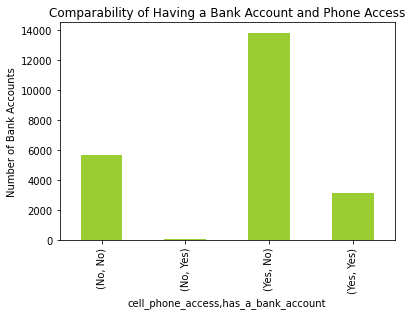

In [38]:
# Visualisation on phone access and owning a bank account.

phone_bank = finances_df.groupby (['cell_phone_access','has_a_bank_account'])['has_a_bank_account'].count()
phone_bank.plot(kind='bar', color='yellowgreen')
plt.ylabel('Number of Bank Accounts')
plt.title('Comparability of Having a Bank Account and Phone Access')

Text(0, 0.5, 'Number of Bank Accounts')

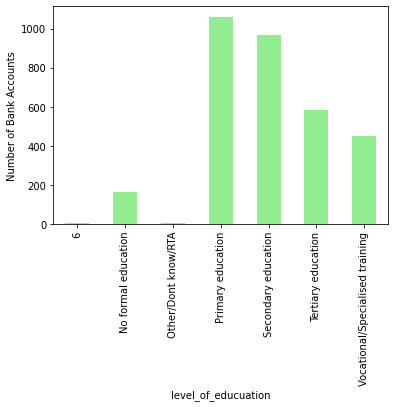

In [39]:
# Visualization of the level of Education against Bank Accounts

education = bank_account.groupby (['level_of_educuation'])['has_a_bank_account'].count()
education.plot(kind='bar',  color='lightgreen')
plt.ylabel('Number of Bank Accounts')

Text(0, 0.5, 'Number of Bank Accounts')

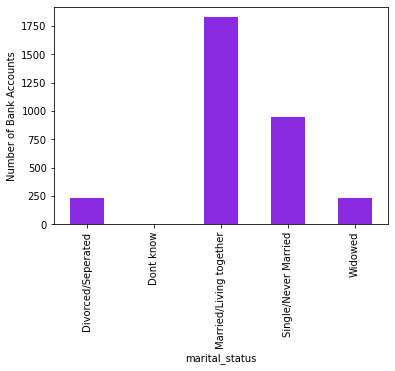

In [40]:
# Visualization of Bank Account Ownership against Marital Status

marital_status =  bank_account.groupby (['marital_status'])['has_a_bank_account'].count()
marital_status.plot(kind='bar',  color='blueviolet')
plt.ylabel('Number of Bank Accounts')

Text(0, 0.5, 'Number of Bank Accounts')

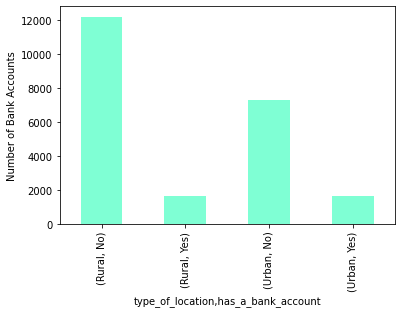

In [41]:
# Visualization of Type of Location against Bank Account Ownership

location = finances_df.groupby (['type_of_location','has_a_bank_account'])['has_a_bank_account'].count()
location.plot(kind='bar',  color='aquamarine')
plt.ylabel('Number of Bank Accounts')


Text(0, 0.5, 'Number of Bank Accounts')

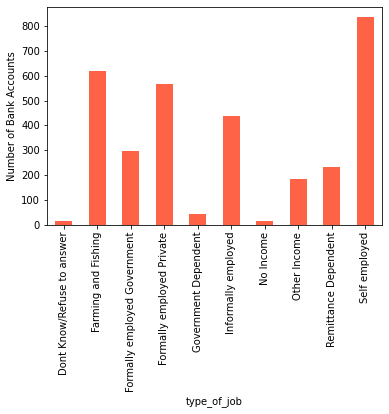

In [42]:
# Visualization of Type of job against Bank Account Ownership

job_type = bank_account.groupby (['type_of_job'])['has_a_bank_account'].count()
job_type.plot(kind='bar',  color='tomato')
plt.ylabel('Number of Bank Accounts')

## Multivariate Analysis

In [43]:
# Chi Test

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
finances_df['country'] = lb.fit_transform(finances_df['country'].astype(str))
finances_df['type_of_location']=lb.fit_transform(finances_df['type_of_location'].astype(str))
finances_df['cell_phone_access']=lb.fit_transform(finances_df['cell_phone_access'].astype(str))
finances_df['gender_of_respondent']=lb.fit_transform(finances_df['gender_of_respondent'].astype(str))
finances_df['marital_status']=lb.fit_transform(finances_df['marital_status'].astype(str))
finances_df['level_of_educuation']=lb.fit_transform(finances_df['level_of_educuation'].astype(str))
finances_df['type_of_job']=lb.fit_transform(finances_df['type_of_job'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [44]:
finances_df.sample(14)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_educuation,type_of_job
11915,1,2016-01-01,No,0,1,8.0,36.0,0,2,3,9
19262,2,2017-01-01,No,1,1,2.0,43.0,0,3,3,9
10810,1,2016-01-01,No,0,1,7.0,37.0,1,2,5,2
15160,2,2017-01-01,No,0,1,1.0,65.0,0,2,1,5
6292,1,2016-01-01,No,0,0,6.0,36.0,0,2,1,1
1391,0,2018-01-01,Yes,0,1,6.0,30.0,0,2,4,1
6800,1,2016-01-01,No,0,1,3.0,69.0,1,2,3,1
12929,1,2016-01-01,No,0,1,7.0,23.0,1,3,3,1
20448,2,2017-01-01,No,0,1,4.0,19.0,0,0,4,8
20913,2,2017-01-01,No,1,0,2.0,75.0,1,3,1,9


In [45]:
finances_df['has_a_bank_account']=lb.fit_transform(finances_df['has_a_bank_account'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


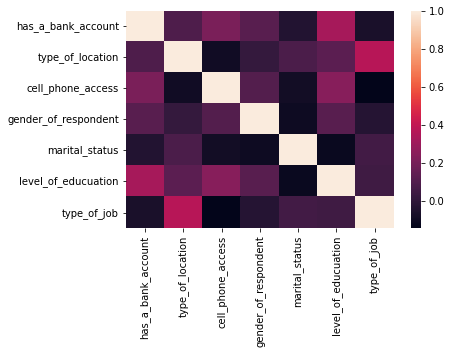

In [46]:
# Correlation of Dataset columns

hsizeage = finances_df[['has_a_bank_account', 'type_of_location',
       'cell_phone_access', 
       'gender_of_respondent','marital_status',
       'level_of_educuation', 'type_of_job']]
sns.heatmap(hsizeage.corr(),annot=False)
plt.show()

The strongest co-relations are

1. Type of location and job
2. Access to banking and level of education
3. Access to banking and cellphone access
4. Cellphone access to level of education

The weakest co-relations are
1. Access to banking and the type of job
2. Access to banking and marital status
3. Type of Location and cell-phone access
4. Cellphone access and type of job
5. Cellphone access and marital status
6. Gender of respondent and marital status
7. Marital status and level of education
8. Gender of respondent and type of job

### PCA Analysis

In [48]:
# Preprocessing
# Divide the dataset into a feature set and corresponding labels

x = finances_df.iloc[:, 6:-5].values
y = finances_df[['country','has_a_bank_account','type_of_location',	'cell_phone_access','gender_of_respondent','marital_status','level_of_educuation'	,'type_of_job']].values


In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test

(array([], shape=(18182, 0), dtype=float64),
 array([], shape=(4546, 0), dtype=float64),
 array([[2, 0, 1, ..., 3, 3, 9],
        [2, 0, 1, ..., 3, 3, 9],
        [1, 0, 1, ..., 2, 3, 9],
        ...,
        [1, 0, 0, ..., 3, 3, 1],
        [1, 0, 0, ..., 2, 1, 1],
        [0, 1, 0, ..., 2, 4, 1]]),
 array([[1, 0, 1, ..., 3, 4, 9],
        [1, 0, 1, ..., 2, 3, 3],
        [2, 0, 1, ..., 3, 3, 9],
        ...,
        [1, 0, 0, ..., 4, 1, 1],
        [0, 0, 0, ..., 2, 3, 1],
        [2, 1, 0, ..., 0, 5, 5]]))

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
#Using 2 Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
#Training and Making Predictions
#we use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

## Challenging the Solution

The data was skewed in the following ways:
1. Majority of the data was collected in Rwanda
2. Majority of the data was collected in Rural areas
3. Majority of those who were interviewed were women
4. Majority of those interviewed do not have bank accounts



- Due to the data skews, the data may not be an accurate representation of the real world

## Recommendations

It is clear from our analysis that financial inclusion is yet to be achieved. 
We would recommend that:

- Banks target women groups and enforce financial education to them since the number of women with bank accounts is lower,

- Bank managers in other countries to benchmark from the kenyan banking sector since  Kenya has the highest number of people with bank accounts.

- Countries to ensure financial education reaches the rural areas, since many people do not have bank accounts